# Teste Analytica
### Rogério Rodrigues e Wanderson Marques

#### Problema

A partir de conjunto de dados de notas fiscais eletrônicas de um
restaurante, fazer estimativa de vendas futuras.

#### Missão

1. Fazer parsing dos dados e formatá-los para uso (ex: csv, dataframe)
2. Identificar padrão através de visualização dos dados que possa ajudar a estimar quanto um possivelmente cliente irá gastar.
3. Fazer previsão de vendas para a semana seguinte aos dados.

#### Etapas realizadas para atender o objetivo
1. Carregar o dataset (csv) como um Pandas DataFrame. Os dados foram normalizados a partir do arquivo JSON no R
2. Explorar os dados
3. Limpar e tranformar os dados
    1. Eliminar os atributos cujo valores são os mesmos para todos os registros
    2. Renomear colunas
    3. Converter o atributo dataHoraEmissao para DateTime
    4. Criar tabela de pedidos, selecionando atributos úteis e removendo duplicatas
    5. Criar tabela de itens dos pedidos
    6. Gerar atributos derivados de dataHoraEmissao
    7. Converter atributo mesa (infComplementar) para inteiro
    8. Traduzir dias da semana para português
    9. Visualizar os dataframes
    10. Ver pairplot
    11. Ver Outliers
    12. Remover Outliers
4. Visualização de informações relevantes
5. Avaliar desempenho das técnicas de Machine Learning
6. Aplicar técnica com melhor desempenho
7. Regras de associação: Apriori

In [1]:
# Importar biblotecas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Mostrar os gráficos dentro do notebook
%matplotlib inline

### Carregar o dataset (csv) 

#### Normalização dos dados

O dataset utilizado na análise descrita abaixo originalmente foi disponibilizado em formato JSON. Em alguns atributos existiam objetos aninhados.

Diante dessa situação, a primeira tarefa consistiu em "planificar" o dataset. Considerando as habilidades técnicas da equipe e as ferramentas disponíveis, preferimos utilizar a linguagem R para a realização de tal atividade. Observação: o código em R encontra-se no repositório.

Suspeitamos que o mesmo resultado poderia ser alcançado utilizando a função json_normalize do Pandas, mas entendemos que a solução ideal neste caso seria aquela mais rápida. Aproveitamos para demonstrar o conhecimento em outra ferramenta que ajudou na resolução do problema.

#### Pandas DataFrame

O Pandas, pacote amplamente utilizado, é utilizado para a manipulação dos dados

In [2]:
# Ler o arquivo csv. 
# Os atributos são separados com ponto e vírgula e os valores decimais usam vírgula
dados = pd.read_csv('dados.csv', sep=';', decimal=",")

### Explorar os dados

A etapa de exploração dos dados possibilita entender quais são os atributos, seus tipos e valores, de um conjunto de dados, permitindo compreender os dados e identificar quais melhorias são necessárias para tratar os dados

In [3]:
# Verificar os tipos de cada atributo
dados.dtypes

complemento.valorTotal      float64
emit.cnpj                    object
emit.xFant                   object
emit.enderEmit.fone          object
emit.enderEmit.xBairro      float64
emit.enderEmit.xLgr          object
emit.enderEmit.xMun          object
emit.enderEmit.xPais         object
emit.enderEmit.uf            object
ide.dhEmi                    object
ide.natOp                    object
infAdic.infCpl               object
total.icmsTot.vDesc         float64
total.icmsTot.vFrete          int64
total.icmsTot.vOutro          int64
total.icmsTot.vProd         float64
total.icmsTot.vSeg            int64
total.icmsTot.vTotTrib      float64
total.icmsTot.vbc             int64
total.icmsTot.vbcst           int64
total.icmsTot.vcofins         int64
total.icmsTot.vicms           int64
total.icmsTot.vicmsDeson      int64
total.icmsTot.vii             int64
total.icmsTot.vipi            int64
total.icmsTot.vnf           float64
total.icmsTot.vpis            int64
total.icmsTot.vst           

In [4]:
# Descrever todos os atributos
dados.describe(include='all')

,complemento.valorTotal,emit.cnpj,emit.xFant,emit.enderEmit.fone,emit.enderEmit.xBairro,emit.enderEmit.xLgr,emit.enderEmit.xMun,emit.enderEmit.xPais,emit.enderEmit.uf,ide.dhEmi,...,total.icmsTot.vpis,total.icmsTot.vst,id,nItem,prod.indTot,prod.qCom,prod.uCom,prod.vProd,prod.vUnCom,prod.xProd
count,3547.000000,3547,3547,3547,0.0,3547,3547,3547,3547,3547,...,3547.0,3547.0,3547.000000,3547.000000,3547.0,3547.000000,3547,3547.000000,3547.000000,3547
unique,NaN,1,1,1,NaN,1,1,1,1,1629,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,24
top,NaN,01.234.567/0001-89,Analytica,1-650-933-4902,NaN,650 Castro St. unit 210,Mountain View,United States,CA,2016-01-13 23:05:50,...,NaN,NaN,NaN,NaN,NaN,NaN,UN,NaN,NaN,BUFFET
freq,NaN,3547,3547,3547,NaN,3547,3547,3547,3547,10,...,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,1635
mean,66.876332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,826.120383,1.787708,1.0,1.175645,NaN,25.587826,34.449930,NaN
std,53.376959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,472.679184,0.963394,0.0,1.051488,NaN,28.452314,32.086144,NaN
min,9.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.000000,1.000000,1.0,0.112000,NaN,1.000000,1.000000,NaN
25%,34.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,419.500000,1.000000,1.0,0.578000,NaN,4.500000,4.500000,NaN
50%,52.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,818.000000,2.000000,1.0,1.000000,NaN,14.000000,8.200000,NaN
75%,84.445000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1245.000000,2.000000,1.0,1.000000,NaN,34.980000,68.600000,NaN


In [5]:
# Exibir primeiras linhas do dataset
dados.head()

,complemento.valorTotal,emit.cnpj,emit.xFant,emit.enderEmit.fone,emit.enderEmit.xBairro,emit.enderEmit.xLgr,emit.enderEmit.xMun,emit.enderEmit.xPais,emit.enderEmit.uf,ide.dhEmi,...,total.icmsTot.vpis,total.icmsTot.vst,id,nItem,prod.indTot,prod.qCom,prod.uCom,prod.vProd,prod.vUnCom,prod.xProd
0,24.90,01.234.567/0001-89,Analytica,1-650-933-4902,NaN,650 Castro St. unit 210,Mountain View,United States,CA,2016-01-05 12:01:54,...,0,0,1,1,1,1.000,UN,3.50,3.5,AGUA
1,24.90,01.234.567/0001-89,Analytica,1-650-933-4902,NaN,650 Castro St. unit 210,Mountain View,United States,CA,2016-01-05 12:01:54,...,0,0,1,2,1,0.312,KG,21.40,68.6,BUFFET
2,92.53,01.234.567/0001-89,Analytica,1-650-933-4902,NaN,650 Castro St. unit 210,Mountain View,United States,CA,2016-01-05 12:03:52,...,0,0,2,1,1,1.218,KG,83.55,68.6,BUFFET
3,92.53,01.234.567/0001-89,Analytica,1-650-933-4902,NaN,650 Castro St. unit 210,Mountain View,United States,CA,2016-01-05 12:03:52,...,0,0,2,2,1,2.000,UN,9.00,4.5,REFRIGERANTE
4,57.86,01.234.567/0001-89,Analytica,1-650-933-4902,NaN,650 Castro St. unit 210,Mountain View,United States,CA,2016-01-05 12:16:40,...,0,0,3,1,1,1.000,UN,4.50,4.5,SUCO


### Limpar e tranformar os dados

Abaixo será realizado todas as etapas necessárias para melhorar a qualidade dos dados.

#### Eliminar todas os atributos cujo valores são os mesmos para todos os registros 

Conforme visto nas duas células acima, existe alguns atributos contendo apenas um valor. Este atributo não representa nenhuma característica útil para os dados, portanto eles serão removidos.

Uma função genérica criada abaixo é responsável por percorrer todos os atributos e eliminar os que estão nesta condição.

In [6]:
# Quantidade de atributos x linhas
# Antes: 36 atributos
dados.shape

(3547, 36)

In [7]:
# Eliminar todas os atributos cujo valores são os mesmos para todos os registros
for coluna in dados:
    if (dados[coluna].unique().size == 1):
        dados = dados.drop([coluna], axis=1)  

In [8]:
# Depois: restam apenas 14 atributos
dados.shape

(3547, 14)

#### Renomear atributos

Os atributos serão renomeados para melhorar o entendimento e identificação de cada característica.

In [9]:
# Renomear atributos
dados = dados.rename(columns={
    'complemento.valorTotal': 'valorTotal',
    'ide.dhEmi': 'dataHoraEmissao',
    'infAdic.infCpl': 'infComplementar',
    'total.icmsTot.vDesc': 'valorDesconto',
    'total.icmsTot.vProd': 'valorProdutos',
    'total.icmsTot.vTotTrib': 'valorTributos',
    'total.icmsTot.vnf': 'valorNF',
    'id': 'id_pedido',
    'nItem': 'nItem',
    'prod.qCom': 'produtoQuantidade',
    'prod.uCom': 'produtoUnidade',
    'prod.vProd': 'produtoPrecoTotal',
    'prod.vUnCom': 'produtoPrecoUnitario',
    'prod.xProd': 'produtoNome',
})

In [10]:
# Verificando os valores do atributo 'dataHoraEmissao'
dados['dataHoraEmissao'].unique()

array(['2016-01-05 12:01:54', '2016-01-05 12:03:52', '2016-01-05 12:16:40',
       ..., '2016-01-23 14:56:16', '2016-01-23 14:56:24',
       '2016-01-23 14:56:35'], dtype=object)

In [11]:
# Como visto acima, o tipo deste atributo é 'object'
# Ajustando atributo para tipo DateTime
dados['dataHoraEmissao'] = pd.to_datetime(dados['dataHoraEmissao'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# Selecionar atributos úteis para pedidos
pedidos = dados[['id_pedido', 'valorTotal', 'dataHoraEmissao', 'infComplementar']]

# Remover linhas duplicadas
pedidos = pedidos.drop_duplicates()

In [13]:
# Selecionar atributos úteis para itens_pedido
itens_pedido = dados[['id_pedido', 'nItem', 'produtoQuantidade', 'produtoPrecoUnitario', 'produtoPrecoTotal', 'produtoNome']]

In [14]:
# Incluir informações de data
pedidos['anoMesDia'] = pedidos['dataHoraEmissao'].dt.date
pedidos['diaSemana'] = pedidos['dataHoraEmissao'].dt.weekday_name
pedidos['diaSemanaN'] = pedidos['dataHoraEmissao'].dt.weekday+1
pedidos['semanaMes'] = pedidos['dataHoraEmissao'].dt.week
pedidos['diaMes'] = pedidos['dataHoraEmissao'].dt.day
pedidos['hora'] = pedidos['dataHoraEmissao'].dt.hour

In [15]:
# Transformar informação da mesa para inteiro
pedidos['infComplementar'] = pedidos['infComplementar'].str.replace('Mesa ', '').astype('int')

In [16]:
# Verificar atributo 'diaSemana'
pedidos['diaSemana'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Monday'], dtype=object)

In [17]:
# Traduzir dias da semana para português
pedidos.loc[pedidos['diaSemana']=='Tuesday', 'diaSemana'] = 'Terça-feira'
pedidos.loc[pedidos['diaSemana']=='Wednesday', 'diaSemana'] = 'Quarta-feira'
pedidos.loc[pedidos['diaSemana']=='Thursday', 'diaSemana'] = 'Quinta-feira'
pedidos.loc[pedidos['diaSemana']=='Friday', 'diaSemana'] = 'Sexta-feira'
pedidos.loc[pedidos['diaSemana']=='Saturday', 'diaSemana'] = 'Sábado'
pedidos.loc[pedidos['diaSemana']=='Monday', 'diaSemana'] = 'Segunda-feira'

In [18]:
# Ver os primeiros pedidos
pedidos.head()

,id_pedido,valorTotal,dataHoraEmissao,infComplementar,anoMesDia,diaSemana,diaSemanaN,semanaMes,diaMes,hora
0,1,24.90,2016-01-05 12:01:54,2,2016-01-05,Terça-feira,2,1,5,12
2,2,92.53,2016-01-05 12:03:52,1,2016-01-05,Terça-feira,2,1,5,12
4,3,57.86,2016-01-05 12:16:40,5,2016-01-05,Terça-feira,2,1,5,12
6,4,34.97,2016-01-05 12:17:50,3,2016-01-05,Terça-feira,2,1,5,12
7,5,46.23,2016-01-05 12:18:35,4,2016-01-05,Terça-feira,2,1,5,12


In [19]:
# Ver os primeiros itens de pedido
itens_pedido.head()

,id_pedido,nItem,produtoQuantidade,produtoPrecoUnitario,produtoPrecoTotal,produtoNome
0,1,1,1.000,3.5,3.50,AGUA
1,1,2,0.312,68.6,21.40,BUFFET
2,2,1,1.218,68.6,83.55,BUFFET
3,2,2,2.000,4.5,9.00,REFRIGERANTE
4,3,1,1.000,4.5,4.50,SUCO


In [20]:
# Verificar se existe algum valor NULL nos pedidos
pedidos.isnull().any()

id_pedido          False
valorTotal         False
dataHoraEmissao    False
infComplementar    False
anoMesDia          False
diaSemana          False
diaSemanaN         False
semanaMes          False
diaMes             False
hora               False
dtype: bool

In [21]:
# Verificar se existe algum valor NULL nos itens_pedidos
itens_pedido.isnull().any()

id_pedido               False
nItem                   False
produtoQuantidade       False
produtoPrecoUnitario    False
produtoPrecoTotal       False
produtoNome             False
dtype: bool

In [22]:
# Realizar os cálculos que forem necessários (contagem, desvio padrão, variância etc)
mediaPedido = pedidos['valorTotal'].mean()
mediaMesa = pedidos.groupby(['infComplementar'])['valorTotal'].mean()
mediaDia = pedidos.groupby(['anoMesDia'])['valorTotal'].mean()
mediaDiaSemana = pedidos.groupby(['diaSemana'])['valorTotal'].mean()
mediaSemana = pedidos.groupby(['semanaMes'])['valorTotal'].mean()
mediaHora = pedidos.groupby(['hora'])['valorTotal'].mean()

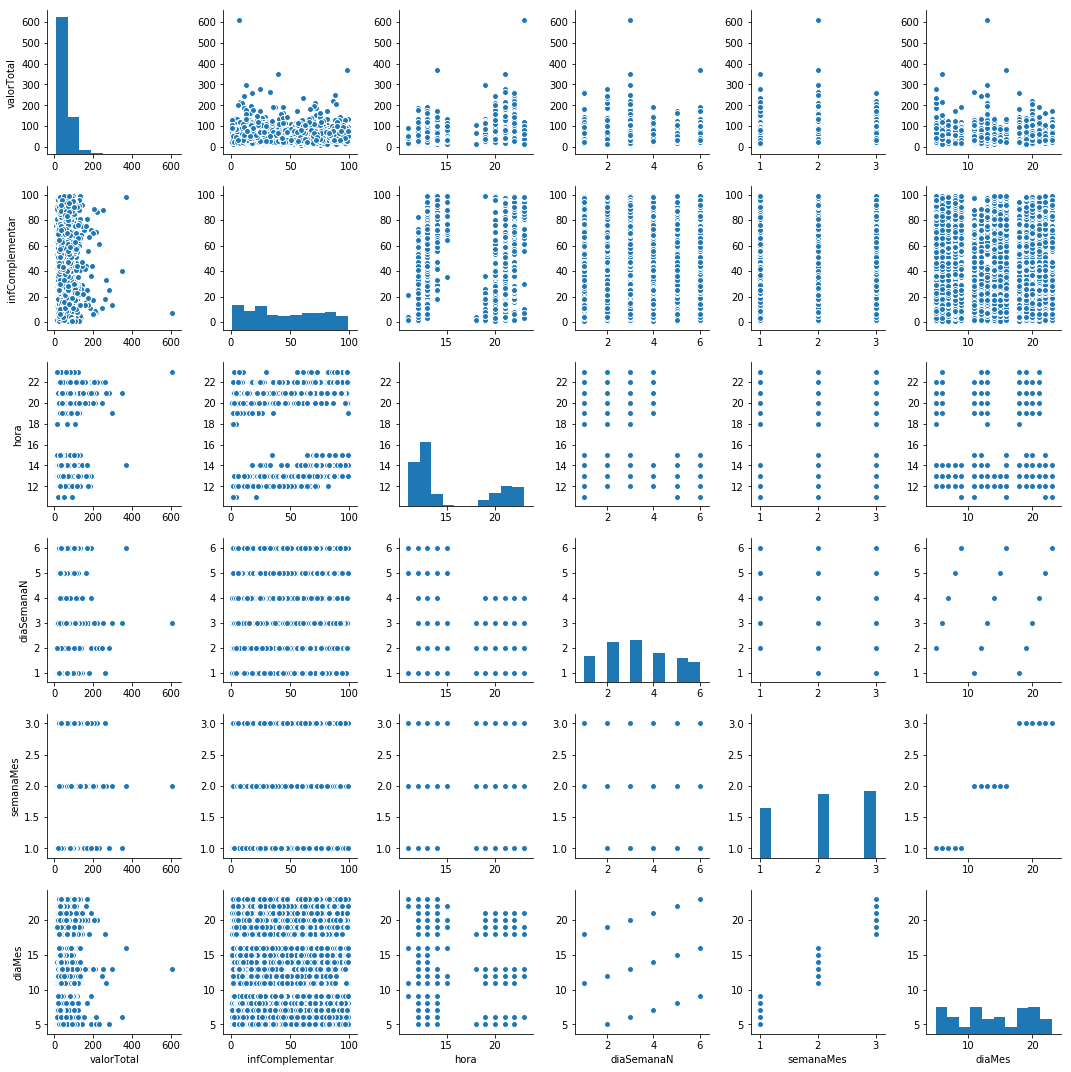

In [23]:
# Gráficos que ajudem na compreensão os dados
plt.rcParams["figure.figsize"] = (20, 20)
sb.pairplot(pedidos[['valorTotal', 'infComplementar', 'hora', 'diaSemanaN', 'semanaMes', 'diaMes']])

#### Eliminar outliers

Outliers podem ser entendidos como ruídos presentes nos dados que podem interferir negativamente o desempenho de técnicas de Machine Learning.
Pensando em evitar os prejuízos causados pelos outliers, abaixo será identificado e retirado os outliers.

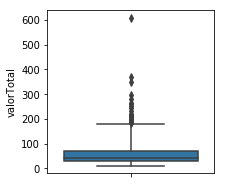

In [24]:
# Ver outliers
plt.rcParams["figure.figsize"] = (3,3)
sb.boxplot(y='valorTotal', data=pedidos, whis=3)

In [25]:
# Quartil 1
q1 = pedidos['valorTotal'].quantile(0.25)

# Quartil 3
q3 = pedidos['valorTotal'].quantile(0.75)

# Interquartil
irq = q3 - q1

# Ponto fora dos limites é considerado outlier
minimo = q1-(3*irq) # Quartil 1 - 3x Interquartil
maximo = q3+(3*irq) # Quartil 3 + 3x Interquartil

# Retirar os outliers
pedidos = pedidos[(pedidos['valorTotal'] > minimo) & (pedidos['valorTotal'] < maximo)]

### Visualização de informações relevantes

Após a limpeza e tratamento dos dados, abaixo será gerado alguns gráficos com informações relevantes que possam contribuir para a identificação de padrões referentes aos gastos dos clientes.

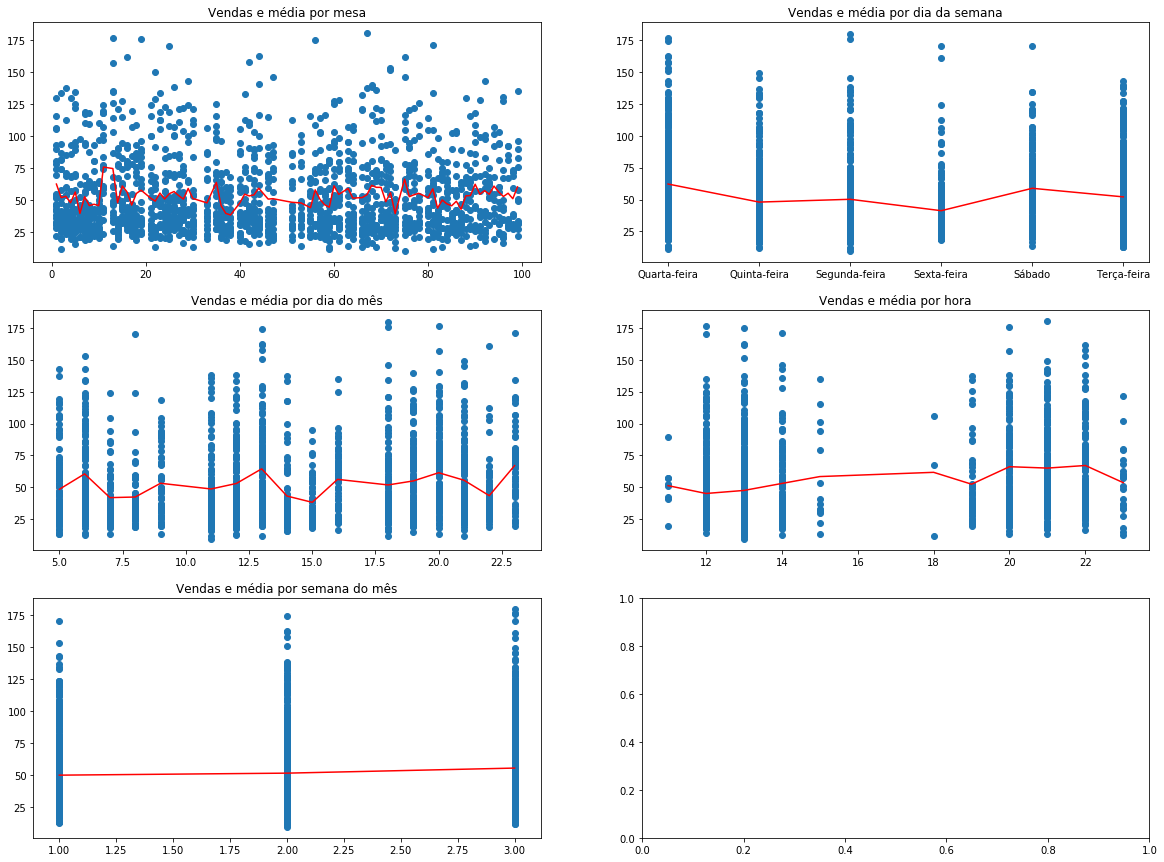

In [27]:
# Visualizando informações relevantes
f, axarr = plt.subplots(3, 2)
plt.rcParams["figure.figsize"] = (20,15)
axarr[0, 0].scatter(x=pedidos['infComplementar'], y=pedidos['valorTotal'])
axarr[0, 0].plot(pedidos.groupby(['infComplementar'])['valorTotal'].mean(), color='red')
axarr[0, 0].set_title('Vendas e média por mesa')

axarr[0, 1].plot(pedidos.groupby(['diaSemana'])['valorTotal'].mean(), color='red')
axarr[0, 1].scatter(x=pedidos['diaSemana'], y=pedidos['valorTotal'])
axarr[0, 1].set_title('Vendas e média por dia da semana')

axarr[1, 0].plot(pedidos.groupby(['diaMes'])['valorTotal'].mean(), color='red')
axarr[1, 0].scatter(x=pedidos['diaMes'], y=pedidos['valorTotal'])
axarr[1, 0].set_title('Vendas e média por dia do mês')

axarr[1, 1].plot(pedidos.groupby(['hora'])['valorTotal'].mean(), color='red')
axarr[1, 1].scatter(x=pedidos['hora'], y=pedidos['valorTotal'])
axarr[1, 1].set_title('Vendas e média por hora')

axarr[2, 0].plot(pedidos.groupby(['semanaMes'])['valorTotal'].mean(), color='red')
axarr[2, 0].scatter(x=pedidos['semanaMes'], y=pedidos['valorTotal'])
axarr[2, 0].set_title('Vendas e média por semana do mês')

plt.show()

### Avaliar desempenho das técnicas de Machine Learning

In [28]:
# Importar bibliotecas necessárias para a tarefa de predição
from sklearn.model_selection import train_test_split
from sklearn import tree, svm, naive_bayes, neighbors, ensemble
from sklearn.linear_model import LogisticRegression

In [29]:
# Array contendo todas as tecnicas para realizar o teste
# Caso queira retirar alguma técnica do teste de avaliação, 
# basta retirar ela desta váriavel sem precisar alterar todo o código para baixo
tecnicas = [
            ['Logistic Regression', LogisticRegression()],
            ['Decision Tree Classifier', tree.DecisionTreeClassifier(criterion='gini')],
            ['Decision Tree Regressor', tree.DecisionTreeRegressor()],
            ['SVM SVC', svm.SVC()],
            ['SVM LinearSVC', svm.LinearSVC()],
            ['SVM SVR', svm.SVR()],
            ['Naive Bayes GaussianNB', naive_bayes.GaussianNB()],
            ['Naive Bayes BernoulliNB', naive_bayes.BernoulliNB()],
            ['Naive Bayes MultinomialNB', naive_bayes.MultinomialNB()],
            ['KNN Classifier', neighbors.KNeighborsClassifier()],
            ['KNN Regressor', neighbors.KNeighborsRegressor()],
            ['KNN NearestCentroid', neighbors.NearestCentroid()],
            ['Random Forest Classifier', ensemble.RandomForestClassifier()],
            ['Random Forest Regressor', ensemble.RandomForestRegressor()],
            ['Gradient Boosting Classifier', ensemble.GradientBoostingClassifier()],
            ['Gradient Boosting Regressor', ensemble.GradientBoostingRegressor()]
]

In [30]:
# Função para avaliação do desempenho das técnicas
# Será calculado a média da porcentagem de erros de cada técnica
# E o score também será armazenado para fins de comparativo

def calcularDesempenhoTecnicas(tecnica, y_pred, score):
    global pdResultadosTecnicas, mediaResultadosTecnicas
    valorCorreto = y_test
    valorPredicao = y_pred
    
    # Cálculo para descobrir a porcentagem de erro entre o valor da predição e o valor correto
    porcentagemErro = abs(((valorPredicao / valorCorreto)-1)) * 100
    
    # Guardar os resultados da predição, valor correto, e porcentagem de erro
    resultado = pd.DataFrame([[tecnica, valorCorreto, valorPredicao, porcentagemErro]], columns=colunasResultadosPD)
    pdResultadosTecnicas = pdResultadosTecnicas.append([resultado])
    
    # Guardar os valores da média da porcentagem de erros e o score
    mediaScore = pd.DataFrame([[tecnica, np.mean(porcentagemErro), score]], columns=colunasMediaPD)
    mediaResultadosTecnicas = mediaResultadosTecnicas.append(mediaScore)

In [31]:
# Função que recebe a técnica (model), treina (fit), realiza a predição (predict), coleta o score e repassa o resultado
def tecnicaFitPredict(tecnica, model):
    # Treinando técnica
    model.fit(X_train, y_train)
    
    # Realizando predição
    y_pred = model.predict(X_test)
    
    # Score
    score = model.score(X_test, y_test)
    calcularDesempenhoTecnicas(tecnica, y_pred, score)

In [32]:
# Função para percorrer todas as tecnicas presentes no array passado por parâmetro,
# e repassar para a função de treino e avaliação (fit,predict,score)
def executarTecnicas(tecnicas):
    for tecnica, model in tecnicas:
        tecnicaFitPredict(tecnica, model)

In [33]:
# DataFrame para armazenar a média da avaliação de cada técnica e o score
colunasMediaPD = ['tecnica', 'mediaPorcentagemErro', 'score']
mediaResultadosTecnicas = pd.DataFrame(columns=colunasMediaPD)

# DataFrame para armazenar o comparativo entre o valor correto e o valor da predição
colunasResultadosPD = ['tecnica', 'valorCorreto', 'predição', 'porcentagemErro']
pdResultadosTecnicas = pd.DataFrame(columns=colunasResultadosPD)

### Missão 2



In [34]:
# Preparando dados para atender a segunda missão
X = pedidos[['hora', 'diaMes', 'diaSemanaN', 'infComplementar', 'semanaMes']]
y = pedidos['valorTotal'].astype('int64').values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [35]:
# Executar operações para treinar e avaliar as técnicas
executarTecnicas(tecnicas)

In [36]:
# Mostrando resultados das técnicas ordenado pela media da porcentagem de erros
mediaResultadosTecnicas.sort_values(by='mediaPorcentagemErro', ascending=True)

,tecnica,mediaPorcentagemErro,score
0,Logistic Regression,39.558724,0.018576
0,SVM SVC,40.835698,0.027864
0,Naive Bayes BernoulliNB,41.118257,0.015480
0,SVM SVR,41.797265,-0.130440
0,KNN Classifier,45.694430,0.018576
0,Gradient Boosting Regressor,48.174533,0.167336
0,KNN Regressor,48.739083,0.032492
0,Random Forest Regressor,50.211654,0.029804
0,Decision Tree Classifier,57.325048,0.015480
0,Random Forest Classifier,57.643559,0.030960


In [37]:
# Com base na avaliação feita acima, a técnica com o melhor desempenho para este cernário, é:
# LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
predictLogReg = logReg.predict(X_test) #predictions
logReg.score(X_test, y_test)

0.018575851393188854

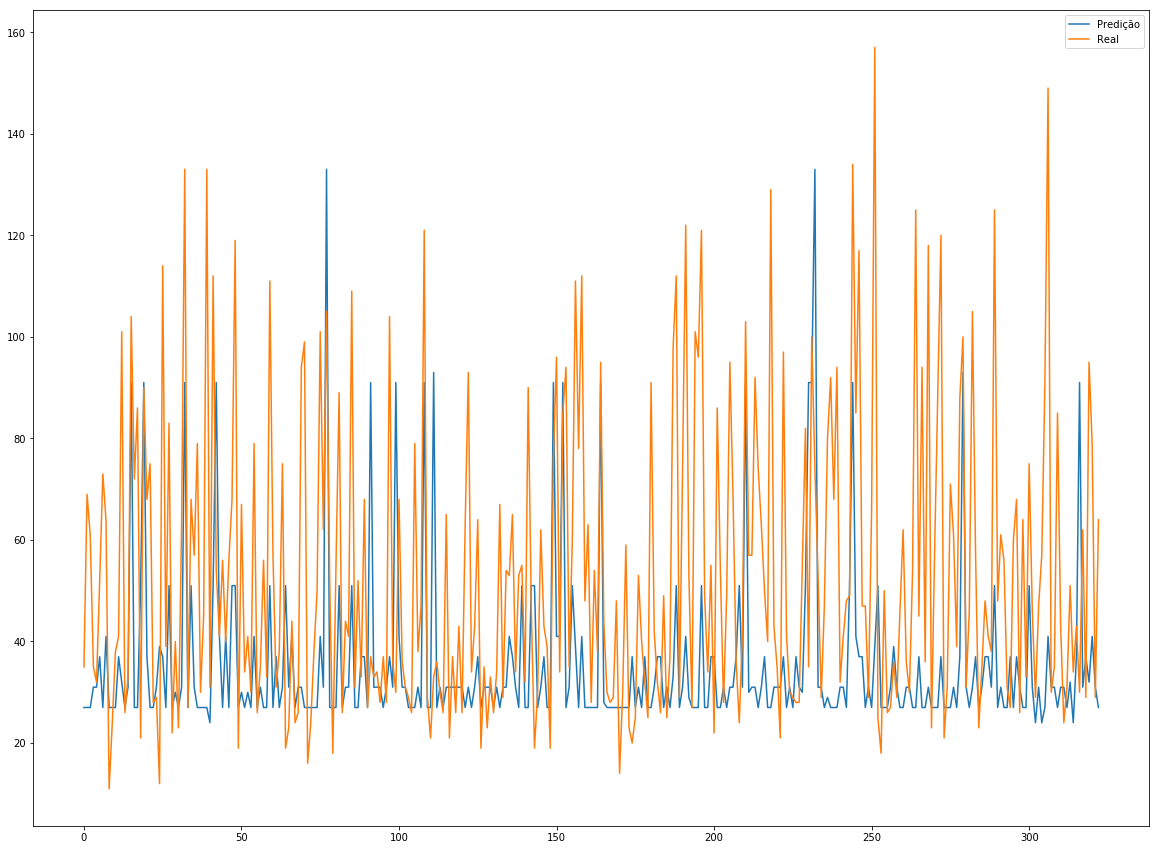

In [38]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(predictLogReg)
plt.plot(y_test)
plt.legend(['Predição', 'Real'])

#### Cenário para nova predição

João foi ao restaurante no dia 26/01/2016 (Terça-Feira) para almoçar (13:00) e se sentou na mesa 30.

Com base nessas informações podemos utilizar o modelo treinado para realizar a predição do valor total

In [39]:
# Predição do cenário
horario = 13
dia = 26
diaSemana = 2
mesa = 30
semanaMes = 4

# Realizando predição do cenário
caso = logReg.predict([[horario,  dia,  diaSemana,  mesa,  semanaMes]])

print('O cliente João irá gastar: ' + str(caso[0]))

O cliente João irá gastar: 31


**Novo cenário:**

Joana foi ao restaurante no dia 30/01/2016 (Sábado) para jantar (20:00) e se sentou na mesa 88.

In [40]:
# Predição do cenário
horario = 20
dia = 30
diaSemana = 6
mesa = 88
semanaMes = 4

# Realizando predição do cenário
caso = logReg.predict([[horario,  dia,  diaSemana,  mesa,  semanaMes]])

print('A cliente Joana irá gastar: ' + str(caso[0]))

A cliente Joana irá gastar: 27


### Missão 3

In [41]:
# Preparando dados para atender a terceira missão
dados_predict = pedidos[['diaMes', 'semanaMes', 'diaSemanaN', 'valorTotal']]

# Agrupando o total de vendas por dia
dados_predict = dados_predict.groupby(['diaMes', 'semanaMes', 'diaSemanaN'], as_index=False)['valorTotal'].sum()
dados_predict.head()

,diaMes,semanaMes,diaSemanaN,valorTotal
0,5,1,2,5908.77
1,6,1,3,7082.13
2,7,1,4,3225.95
3,8,1,5,3050.43
4,9,1,6,3082.59


In [42]:
# Separando dados para treino e teste
X = dados_predict.drop(['valorTotal'], axis=1)

y = dados_predict['valorTotal'].astype('int64').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [43]:
# DataFrame para armazenar a média da avaliação de cada técnica e o score
colunasMediaPD = ['tecnica', 'mediaPorcentagemErro', 'score']
mediaResultadosTecnicas = pd.DataFrame(columns=colunasMediaPD)

# DataFrame para armazenar o comparativo entre o valor correto e o valor da predição
colunasResultadosPD = ['tecnica', 'valorCorreto', 'predição', 'porcentagemErro']
pdResultadosTecnicas = pd.DataFrame(columns=colunasResultadosPD)

In [44]:
# Executar operações para treinar e avaliar as técnicas
executarTecnicas(tecnicas)

In [45]:
# Mostrando resultados das técnicas ordenado pela media da porcentagem de erros
mediaResultadosTecnicas.sort_values(by='mediaPorcentagemErro', ascending=True)

,tecnica,mediaPorcentagemErro,score
0,Gradient Boosting Regressor,5.941548,0.939354
0,Decision Tree Classifier,7.884406,0.000000
0,Decision Tree Regressor,8.319870,0.890437
0,Gradient Boosting Classifier,8.802225,0.000000
0,SVM SVC,10.516760,0.000000
0,Naive Bayes GaussianNB,10.516760,0.000000
0,KNN NearestCentroid,10.516760,0.000000
0,Random Forest Regressor,18.839986,0.693212
0,Naive Bayes MultinomialNB,19.296185,0.000000
0,Random Forest Classifier,20.605718,0.000000


In [46]:
# Com base na avaliação feita acima, a técnica com o melhor desempenho para este cernário, é:
# Gradient Boosting Regressor
gbRegressor = ensemble.GradientBoostingRegressor()
gbRegressor.fit(X_train, y_train)
predictGBRegressor = gbRegressor.predict(X_test)
gbRegressor.score(X_test, y_test)

0.93935913112281211

In [47]:
# Verificando qual é a última semana dos dados
pedidos.tail(6)

,id_pedido,valorTotal,dataHoraEmissao,infComplementar,anoMesDia,diaSemana,diaSemanaN,semanaMes,diaMes,hora
3532,1630,94.13,2016-01-23 14:24:36,95,2016-01-23,Sábado,6,3,23,14
3534,1631,74.84,2016-01-23 14:27:33,93,2016-01-23,Sábado,6,3,23,14
3537,1632,67.64,2016-01-23 14:48:17,83,2016-01-23,Sábado,6,3,23,14
3539,1633,42.26,2016-01-23 14:56:16,96,2016-01-23,Sábado,6,3,23,14
3541,1634,102.09,2016-01-23 14:56:24,90,2016-01-23,Sábado,6,3,23,14
3545,1635,32.80,2016-01-23 14:56:35,92,2016-01-23,Sábado,6,3,23,14


Última semana é 23/01/2016, a proxima semana vai de 25/01/2016 a 30/01/2016

In [48]:
# Datas da próxima semana
datas = [
    '20160125',
    '20160126',
    '20160127',
    '20160128',
    '20160129',
    '20160130'
]

In [49]:
# Função para retornar os atributos necessários para a predição a partir da data passada no parâmetro
def retornarAtributosPredicao(datas):
    atributos = pd.DataFrame({'data':datas})
    atributos['data'] = pd.to_datetime(atributos['data'], format='%Y-%m-%d')
    atributos['diaMes'] = atributos['data'].dt.day
    atributos['semanaMes'] = atributos['data'].dt.week
    atributos['diaSemanaN'] = atributos['data'].dt.weekday+1
    atributos = atributos.drop('data', axis=1)
    return atributos

In [50]:
# Coletando atributos da próxima semana para predição
proximaSemana = retornarAtributosPredicao(datas)
proximaSemana

,diaMes,semanaMes,diaSemanaN
0,25,4,1
1,26,4,2
2,27,4,3
3,28,4,4
4,29,4,5
5,30,4,6


In [51]:
# Realizando predição de vendas de cada dia da próxima semana
predicaoProximaSemana = gbRegressor.predict(proximaSemana)
predicaoProximaSemana

array([ 6236.36804906,  6613.24284965,  7629.36262979,  5858.09686319,
        3873.94309327,  3952.50026174])

In [52]:
print('A previsão de vendas para a proxima semana é: ' + str(sum(predicaoProximaSemana)))

A previsão de vendas para a proxima semana é: 34163.5137467


### Regras de associação: Apriori

Como uma análise adicional, decidimos também buscar por regras de associação entre os itens dos pedidos. Para isso utilizamos o algoritimo Apriori na linguagem R.

Por meio dessa análise, conseguiríamos por exemplo criar um sistema de recomendação do tipo "Quem comprou X também levou Y". O garçom do restaurante poderia utilizar essa informação para oferecer determinados produtos aos clientes.

As regras de associação são mostradas abaixo:

![title](regra-associacao.png) 

<center>20 primeiras regras de associação geradas ordenadas pelo lift.</center>
![title](tabela-apriori.jpeg) 

### Limitações

Apesar de alcançar um resultado interessante como produto final, acreditamos que outras abordagens poderiam ser utilizadas para solucionar o problema proposto. Uma dessas técnicas baseia-se na análise de séries temporais (Time Series Analysis and Forecasting). Possívelmente os resultados obtidos seriam melhores. Entretanto, considerando a restrição de tempo, optamos por utilizar abordagens no qual possuímos mais familiaridade.